In [1]:
import numpy as np
import shapefile
import shapely
import shapely.geometry
from shapely.geometry import Polygon
from tqdm import tqdm
import pyproj
import scipy.sparse
from create_graph import create_graph
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload    
%autoreload 2

## SP Metropolis 10k Census Regions 

In [5]:
file = gpd.read_file("data/SP_Setores_2021/SP_Setores_2021.shp")
selected_row = 355030866000295
selected_row = file[file["CD_SETOR"].astype(int) == selected_row]
file["distance"] = file["geometry"].apply(lambda x: x.distance(selected_row.iloc[0]["geometry"]))
file = file.sort_values(by = "distance")
file = file[file.NM_MUN == "São Paulo"]
file = file.reset_index(drop = True)
file = file.head(10000)

In [6]:
file.NM_MUN.value_counts()

NM_MUN
São Paulo    10000
Name: count, dtype: int64

In [7]:
file = file.drop(columns = ["distance"])
file.to_file("data/shapefiles/SpCenterCensus10k.shp")

In [8]:
file = gpd.read_file("data/shapefiles/SpCenterCensus10k.shp")
adj_matrix = create_graph(file)
adj_matrix = scipy.sparse.csr_matrix(adj_matrix)
scipy.sparse.save_npz("data/adj_matrix/SpCenterCensus10k.npz", adj_matrix)

100%|██████████| 10000/10000 [00:06<00:00, 1456.11it/s]


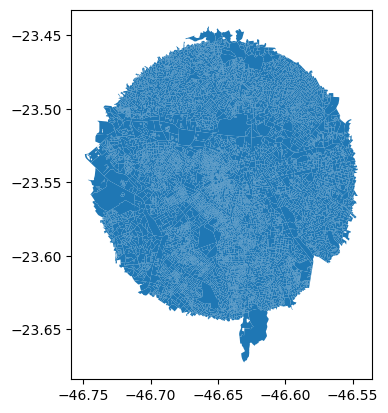

In [9]:
file = gpd.read_file("data/shapefiles/SpCenterCensus10k.shp")
file.plot()
plt.show()

In [17]:
gdf = gpd.read_file("data/shapefiles/SpCenterCensus10k.shp")
gdf = gdf[["geometry"]].reset_index()
gdf.columns = ["id_poly", "geometry"]
gdf.to_file("data/shapefiles/SpCenterCensus10k.geojson", driver='GeoJSON')

## SP Metropolis 20k Census Regions 

In [10]:
file = gpd.read_file("data/SP_Setores_2021/SP_Setores_2021.shp")
selected_row = 355030866000295
selected_row = file[file["CD_SETOR"].astype(int) == selected_row]
file["distance"] = file["geometry"].apply(lambda x: x.distance(selected_row.iloc[0]["geometry"]))
file = file.sort_values(by = "distance")
file = file[file.NM_MUN == "São Paulo"]
file = file.reset_index(drop = True)
file = file.head(20000)

In [11]:
file.NM_MUN.value_counts(), file.NM_MUN.unique()

(NM_MUN
 São Paulo    20000
 Name: count, dtype: int64,
 array(['São Paulo'], dtype=object))

In [12]:
file = file.drop(columns = ["distance"])
file.to_file("data/shapefiles/SpCenterCensus20k.shp")

In [13]:
file = gpd.read_file("data/shapefiles/SpCenterCensus20k.shp")
adj_matrix = create_graph(file)
adj_matrix = scipy.sparse.csr_matrix(adj_matrix)
scipy.sparse.save_npz("data/adj_matrix/SpCenterCensus20k.npz", adj_matrix)

100%|██████████| 20000/20000 [00:14<00:00, 1383.45it/s]


In [14]:
region = file.geometry.unary_union
region = region.simplify(0.01)
gdf = gpd.GeoDataFrame(geometry=[region])
gdf.to_file("data/shapefiles/SpCenterCensus20k_countour.geojson", driver="GeoJSON")

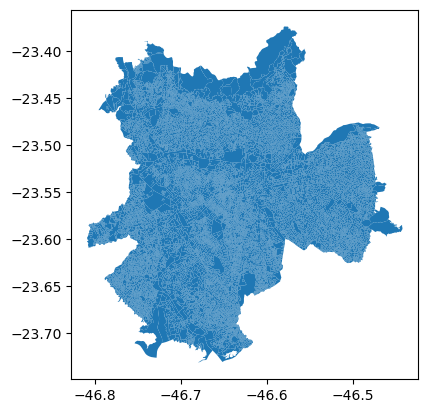

In [15]:
file = gpd.read_file("data/shapefiles/SpCenterCensus20k.shp")
file.plot()
plt.show()

## Districts

In [19]:
file = gpd.read_file("data/LAYER_DISTRITO/DEINFO_DISTRITO.shp")
file = file.to_crs("EPSG:4326")
file.to_file("data/shapefiles/SpDistricts.shp")

In [21]:
shapefile = gpd.read_file("data/shapefiles/SpDistricts.shp")
adj_matrix = create_graph(shapefile)
np.save("data/adj_matrix/SpDistricts.npy", adj_matrix)

100%|██████████| 96/96 [00:00<00:00, 238.77it/s]


In [12]:
gdf = gpd.read_file("data/shapefiles/SpDistricts.shp")
gdf = gdf[["NOME_DIST", "geometry"]].reset_index()
gdf.columns = ["poly_id", "name", "geometry"]
gdf.to_file("data/shapefiles/SpDistricts.geojson", driver='GeoJSON')